Customer churn is the loss of clients or customers. In order to avoid losing customers, a company needs to examine why its customers have left in the past and which features are more important to determine who will churn in the future. Our task is therefore to predict whether customers are about to churn and which are the most important features to get that prediction right. As in most prediction problems, we will use machine learning.

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv("data.csv",sep=';')

In [3]:
data.head()

,Id,Ekspor,Cadangan Devisa,IHSG,Selisih Pinjaman dan Simpanan,Suku Bunga Simpanan Riil,Selisih BI Rate Riil dan FED Rate Riil,Simpanan bank,Nilai Tukar Riil,Nilai Tukar Perdagangan,M1,M2/Cadangan Devisa,M2M,Krisis
0,0,1845.2,6068.2,504.27,1.24,15.56,4.36,14.567329,376.63,1.2366,10.66,0.0055,6.46,1
1,1,2055.0,6259.1,612.20,1.24,16.63,5.83,16.707625,375.39,1.2129,12.15,0.0056,6.16,1
2,4,1750.0,5767.5,624.33,1.22,14.77,7.92,16.067787,388.69,1.0374,12.58,0.0066,6.77,0
3,5,1812.0,6392.7,614.41,1.19,14.29,7.91,16.274743,396.82,1.0315,12.23,0.0060,7.04,0
4,6,2124.0,6615.6,556.34,1.18,16.66,9.74,16.913348,397.52,1.0400,12.08,0.0060,6.76,0


In [4]:
data.shape

(270, 14)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 270 entries, 0 to 269
Data columns (total 14 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   Id                                      270 non-null    int64  
 1   Ekspor                                  270 non-null    float64
 2   Cadangan Devisa                         270 non-null    float64
 3   IHSG                                    270 non-null    float64
 4   Selisih Pinjaman dan Simpanan           270 non-null    float64
 5   Suku Bunga Simpanan Riil                270 non-null    float64
 6   Selisih BI Rate Riil dan FED Rate Riil  270 non-null    float64
 7   Simpanan bank                           270 non-null    float64
 8   Nilai Tukar Riil                        270 non-null    float64
 9   Nilai Tukar Perdagangan                 270 non-null    float64
 10  M1                                      270 non-null    float6

In [6]:
data.describe()

,Id,Ekspor,Cadangan Devisa,IHSG,Selisih Pinjaman dan Simpanan,Suku Bunga Simpanan Riil,Selisih BI Rate Riil dan FED Rate Riil,Simpanan bank,Nilai Tukar Riil,Nilai Tukar Perdagangan,M1,M2/Cadangan Devisa,M2M,Krisis
count,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000
mean,174.429630,8247.868963,53516.383556,2071.609444,1.500222,12.016000,8.328000,134.058398,7232.566259,1.225759,41.406296,0.003716,6.763333,0.111111
std,101.887141,4853.028611,41132.468503,2014.293535,0.333443,7.509484,7.233576,100.175825,5550.579030,0.214566,29.628941,0.001151,5.115211,0.314853
min,0.000000,1750.000000,5767.500000,226.680000,0.660000,0.680000,1.250000,14.567329,375.390000,0.851500,7.350000,0.002000,4.190000,0.000000
25%,88.250000,4082.750000,19042.000000,462.717500,1.220000,6.622500,5.107500,58.468779,742.267500,1.063950,16.475000,0.003000,5.020000,0.000000
50%,172.500000,6261.415000,34816.185000,759.030000,1.505000,10.395000,6.515000,83.851499,6753.570000,1.166350,26.455000,0.003200,6.180000,0.000000
75%,262.750000,12936.765000,102477.375000,3916.700000,1.760000,15.330000,8.822500,245.694303,10000.275000,1.373825,73.185000,0.004600,7.900000,0.000000
max,351.000000,18530.800000,130196.380000,6597.220000,2.410000,52.980000,59.880000,330.612337,19358.390000,1.857700,104.840000,0.006600,86.970000,1.000000


# Data Cleaning & Pre Processing

In [7]:
data=data.drop_duplicates()

In [8]:
#Check Missing Values
data.isnull().sum()

Id                                        0
Ekspor                                    0
Cadangan Devisa                           0
IHSG                                      0
Selisih Pinjaman dan Simpanan             0
Suku Bunga Simpanan Riil                  0
Selisih BI Rate Riil dan FED Rate Riil    0
Simpanan bank                             0
Nilai Tukar Riil                          0
Nilai Tukar Perdagangan                   0
M1                                        0
M2/Cadangan Devisa                        0
M2M                                       0
Krisis                                    0
dtype: int64

# Outlier Detection

C:\Users\User\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


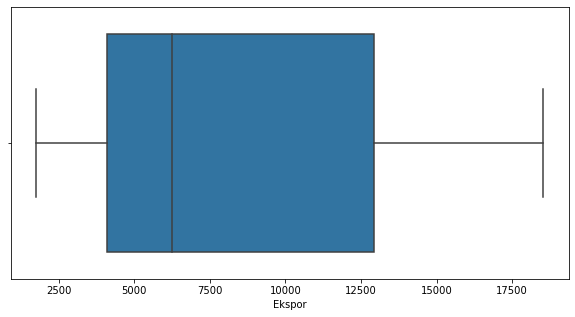

In [9]:
#Ekspor

plt.figure(figsize=(10,5))
sns.boxplot(data["Ekspor"])
plt.show()

C:\Users\User\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


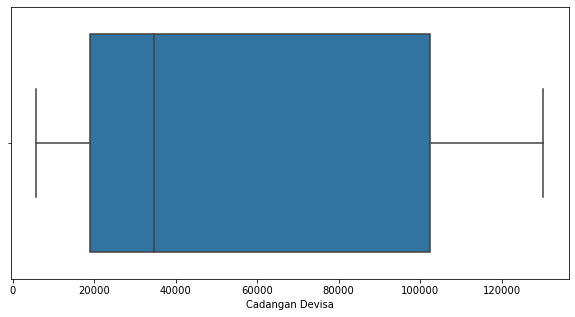

In [10]:
#Cadangan Devisa

plt.figure(figsize=(10,5))
sns.boxplot(data["Cadangan Devisa"])
plt.show()

C:\Users\User\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


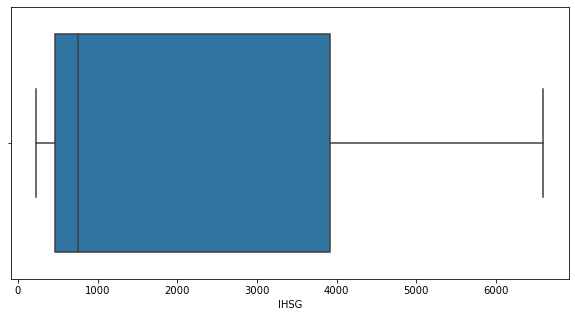

In [11]:
#IHSG

plt.figure(figsize=(10,5))
sns.boxplot(data["IHSG"])
plt.show()

C:\Users\User\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


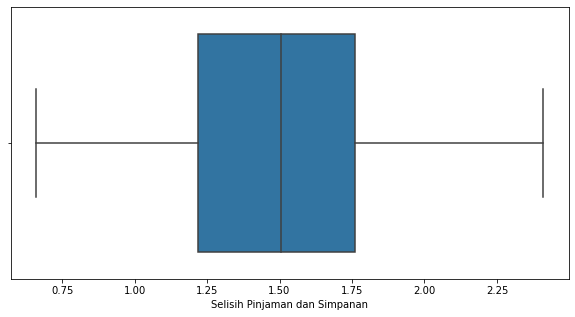

In [12]:
#Selisih Pinjaman dan Simpanan

plt.figure(figsize=(10,5))
sns.boxplot(data["Selisih Pinjaman dan Simpanan"])
plt.show()

C:\Users\User\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


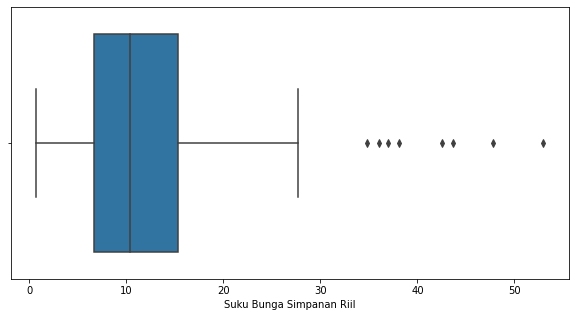

In [13]:
plt.figure(figsize=(10,5))
sns.boxplot(data["Suku Bunga Simpanan Riil"])
plt.show()

C:\Users\User\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


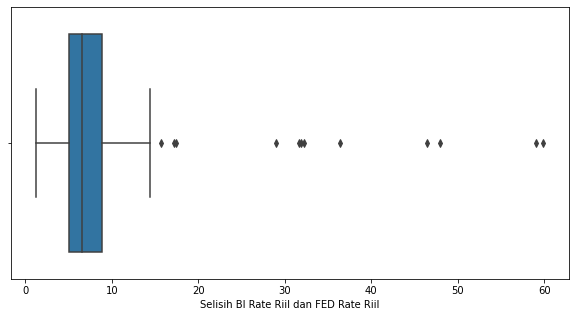

In [14]:
#Selisih BI Rate Riil dan FED Rate Riil

plt.figure(figsize=(10,5))
sns.boxplot(data["Selisih BI Rate Riil dan FED Rate Riil"])
plt.show()

C:\Users\User\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


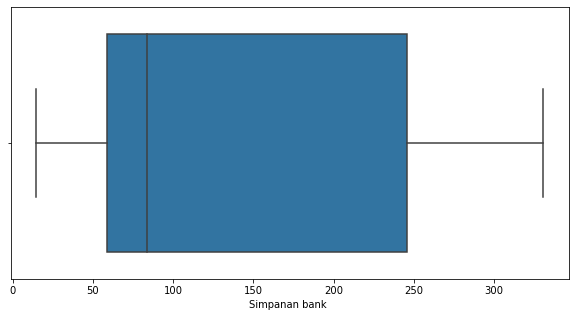

In [15]:
#Simpanan Bank

plt.figure(figsize=(10,5))
sns.boxplot(data["Simpanan bank "])
plt.show()

C:\Users\User\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


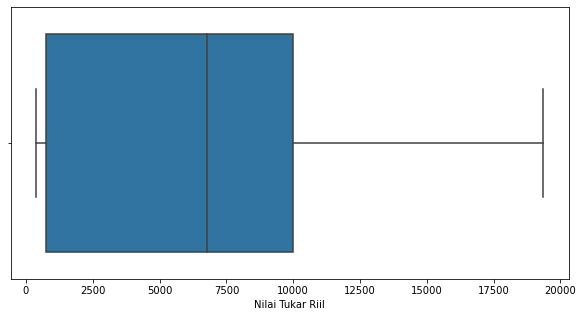

In [16]:
#Nilai Tukar Riil

plt.figure(figsize=(10,5))
sns.boxplot(data["Nilai Tukar Riil"])
plt.show()

C:\Users\User\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


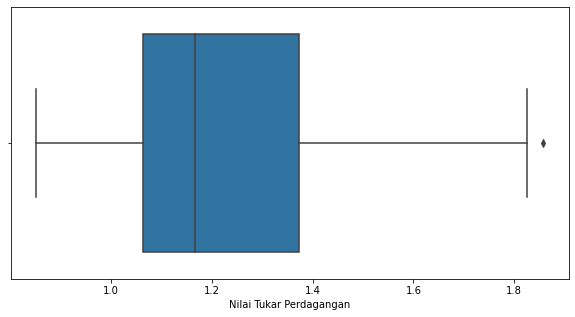

In [17]:
#Nilai Tukar Perdagangan
plt.figure(figsize=(10,5))
sns.boxplot(data["Nilai Tukar Perdagangan"])
plt.show()

C:\Users\User\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


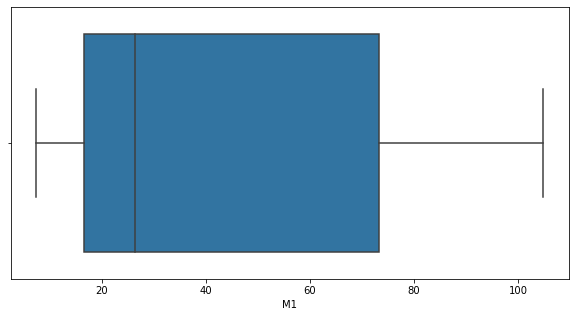

In [18]:
#M1

plt.figure(figsize=(10,5))
sns.boxplot(data["M1"])
plt.show()

C:\Users\User\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


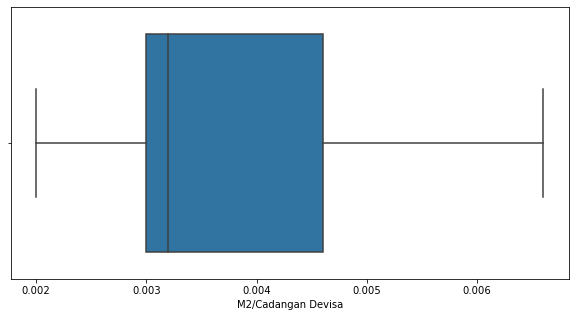

In [19]:
#M2/Cadangan Devisa

plt.figure(figsize=(10,5))
sns.boxplot(data["M2/Cadangan Devisa"])
plt.show()

C:\Users\User\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


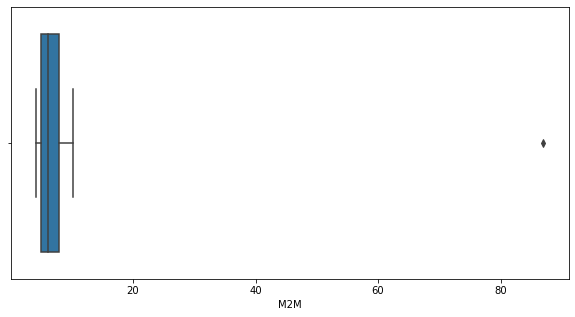

In [20]:
#M2M 

plt.figure(figsize=(10,5))
sns.boxplot(data["M2M"])
plt.show()

# Fixing Outlier

In [21]:
#See observation outliers on the Suku Bunga Simpanan Riil variable
Q1=data["Suku Bunga Simpanan Riil"].quantile(0.25)
Q3=data["Suku Bunga Simpanan Riil"].quantile(0.75)
IQR=Q3-Q1
lower_range = Q1 -(1.5 * IQR)
upper_range = Q3 +(1.5 * IQR)
data.loc[(data["Suku Bunga Simpanan Riil"]>upper_range),:]



,Id,Ekspor,Cadangan Devisa,IHSG,Selisih Pinjaman dan Simpanan,Suku Bunga Simpanan Riil,Selisih BI Rate Riil dan FED Rate Riil,Simpanan bank,Nilai Tukar Riil,Nilai Tukar Perdagangan,M1,M2/Cadangan Devisa,M2M,Krisis
77,100,4668.0,18769.0,445.92,0.83,35.99,47.98,23.505570,6838.86,1.6437,7.35,0.0020,8.05,0
78,102,4252.0,19735.0,342.43,0.79,38.05,59.05,32.776524,5851.73,1.3886,9.44,0.0025,7.88,0
79,103,4781.0,20475.0,276.15,0.75,43.63,59.88,35.314860,5858.66,1.5696,9.59,0.0025,7.83,0
80,105,3542.0,22623.0,386.27,0.66,52.98,46.42,57.130959,3979.76,1.4451,13.83,0.0033,7.54,0
81,106,3557.0,23516.0,398.03,0.71,47.81,32.21,53.631277,4439.82,1.4430,12.61,0.0031,7.69,0
82,107,3041.0,24542.0,411.93,0.76,42.53,28.95,48.650391,5086.23,1.4210,11.39,0.0027,7.97,0
83,108,3357.0,24392.0,396.00,0.91,36.94,31.61,50.421077,5017.68,1.3691,11.85,0.0028,7.75,0
84,110,4127.0,25715.0,495.22,0.93,34.77,31.85,55.035835,4658.60,1.3625,12.19,0.0029,8.13,0


C:\Users\User\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


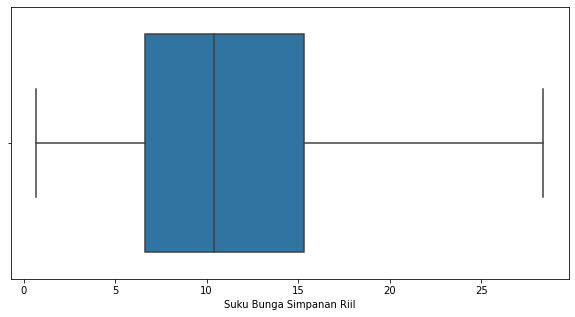

In [22]:
#Replace outlier observations with upper bound and lower bound
data.loc[(data["Suku Bunga Simpanan Riil"]>upper_range),"Suku Bunga Simpanan Riil"]=upper_range

#Check Outlier on the Suku Bunga Simpanan Riil variable
plt.figure(figsize=(10,5))
sns.boxplot(data["Suku Bunga Simpanan Riil"])
plt.show()

In [23]:
#See observation outliers on the Selisih BI Rate Riil dan FED Rate Riil variable
Q1=data["Selisih BI Rate Riil dan FED Rate Riil"].quantile(0.25)
Q3=data["Selisih BI Rate Riil dan FED Rate Riil"].quantile(0.75)
IQR=Q3-Q1
lower_range = Q1 -(1.5 * IQR)
upper_range = Q3 +(1.5 * IQR)
data.loc[(data["Selisih BI Rate Riil dan FED Rate Riil"]>upper_range),:]

,Id,Ekspor,Cadangan Devisa,IHSG,Selisih Pinjaman dan Simpanan,Suku Bunga Simpanan Riil,Selisih BI Rate Riil dan FED Rate Riil,Simpanan bank,Nilai Tukar Riil,Nilai Tukar Perdagangan,M1,M2/Cadangan Devisa,M2M,Krisis
70,91,4689.0,21187.0,546.68,1.01,25.13000,15.66,72.183206,997.72,1.0516,20.23,0.0047,8.98,1
75,97,4908.0,16613.0,541.42,1.02,21.99000,17.17,37.741862,3330.95,1.4945,11.80,0.0033,7.57,1
76,98,4385.0,17742.0,460.13,1.00,24.70000,36.41,42.973067,3131.46,1.1893,12.72,0.0034,7.43,1
77,100,4668.0,18769.0,445.92,0.83,28.39125,47.98,23.505570,6838.86,1.6437,7.35,0.0020,8.05,0
78,102,4252.0,19735.0,342.43,0.79,28.39125,59.05,32.776524,5851.73,1.3886,9.44,0.0025,7.88,0
79,103,4781.0,20475.0,276.15,0.75,28.39125,59.88,35.314860,5858.66,1.5696,9.59,0.0025,7.83,0
80,105,3542.0,22623.0,386.27,0.66,28.39125,46.42,57.130959,3979.76,1.4451,13.83,0.0033,7.54,0
81,106,3557.0,23516.0,398.03,0.71,28.39125,32.21,53.631277,4439.82,1.4430,12.61,0.0031,7.69,0
82,107,3041.0,24542.0,411.93,0.76,28.39125,28.95,48.650391,5086.23,1.4210,11.39,0.0027,7.97,0
83,108,3357.0,24392.0,396.00,0.91,28.39125,31.61,50.421077,5017.68,1.3691,11.85,0.0028,7.75,0


C:\Users\User\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


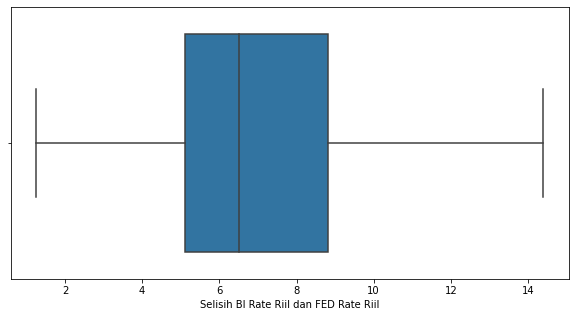

In [24]:
#Replace outlier observations with upper bound and lower bound
data.loc[(data["Selisih BI Rate Riil dan FED Rate Riil"]>upper_range),"Selisih BI Rate Riil dan FED Rate Riil"]=upper_range

#Check Outlier on the Selisih BI Rate Riil dan FED Rate Riil variable
plt.figure(figsize=(10,5))
sns.boxplot(data["Selisih BI Rate Riil dan FED Rate Riil"])
plt.show()

In [25]:
#See observation outliers on the Nilai Tukar Perdagangan variable
Q1=data["Nilai Tukar Perdagangan"].quantile(0.25)
Q3=data["Nilai Tukar Perdagangan"].quantile(0.75)
IQR=Q3-Q1
lower_range = Q1 -(1.5 * IQR)
upper_range = Q3 +(1.5 * IQR)
data.loc[(data["Nilai Tukar Perdagangan"]>upper_range),:]

,Id,Ekspor,Cadangan Devisa,IHSG,Selisih Pinjaman dan Simpanan,Suku Bunga Simpanan Riil,Selisih BI Rate Riil dan FED Rate Riil,Simpanan bank,Nilai Tukar Riil,Nilai Tukar Perdagangan,M1,M2/Cadangan Devisa,M2M,Krisis
93,120,5012.49,28401.0,576.54,1.56,12.57,5.9,68.02052,4141.63,1.8577,16.28,0.0031,7.5,0


C:\Users\User\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


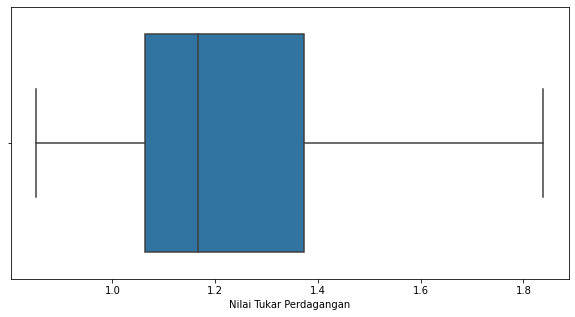

In [26]:
#Replace outlier observations with upper bound and lower bound
data.loc[(data["Nilai Tukar Perdagangan"]>upper_range),"Nilai Tukar Perdagangan"]=upper_range

#Check Outlier on the Nilai Tukar Perdagangan variable
plt.figure(figsize=(10,5))
sns.boxplot(data["Nilai Tukar Perdagangan"])
plt.show()

In [27]:
#See observation outliers on the M2M variable
Q1=data["M2M"].quantile(0.25)
Q3=data["M2M"].quantile(0.75)
IQR=Q3-Q1
lower_range = Q1 -(1.5 * IQR)
upper_range = Q3 +(1.5 * IQR)
data.loc[(data["M2M"]>upper_range),:]

,Id,Ekspor,Cadangan Devisa,IHSG,Selisih Pinjaman dan Simpanan,Suku Bunga Simpanan Riil,Selisih BI Rate Riil dan FED Rate Riil,Simpanan bank,Nilai Tukar Riil,Nilai Tukar Perdagangan,M1,M2/Cadangan Devisa,M2M,Krisis
30,38,2958.0,12204.5,314.1,1.39,15.38,9.64,43.860656,509.62,1.3235,14.32,0.0049,86.97,0


C:\Users\User\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


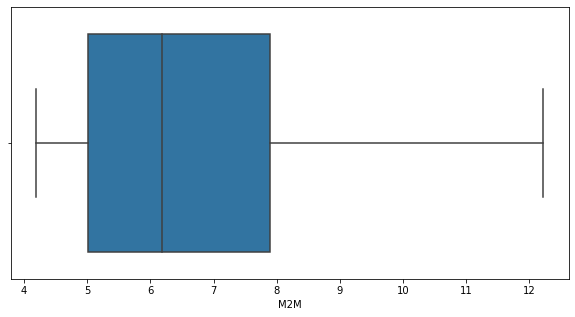

In [28]:
#Replace outlier observations with upper bound and lower bound
data.loc[(data["M2M"]>upper_range),"M2M"]=upper_range

#Check Outlier on the variable
plt.figure(figsize=(10,5))
sns.boxplot(data["M2M"])
plt.show()

# Data Partition

In [29]:
data=data.drop(labels="Id",axis=1)

In [30]:
from sklearn.model_selection import train_test_split

##partition data into data training and data testing
train,test = train_test_split(data,test_size = 0.20 ,random_state = 111)
    
##seperating dependent and independent variables on training and testing data
train_X = train.drop(labels='Krisis',axis=1)
train_Y = train['Krisis']
test_X  = test.drop(labels='Krisis',axis=1)
test_Y  = test['Krisis']

# SMOTE (Synthetic Minority Oversampling Technique)

In [31]:
from imblearn.over_sampling import SMOTE

#handle imbalance class using oversampling minority class with smote method
os = SMOTE(sampling_strategy='minority',random_state = 123,k_neighbors=5)
train_smote_X,train_smote_Y = os.fit_resample(train_X,train_Y)
train_smote_X = pd.DataFrame(data = train_smote_X,columns=train_X.columns)
train_smote_Y = pd.DataFrame(data = train_smote_Y)

In [32]:
#Proportion before smote
train_Y.value_counts()

0    193
1     23
Name: Krisis, dtype: int64

In [33]:
#Proportion after smote
train_smote_Y.value_counts()

Krisis
0         193
1         193
dtype: int64

# Modelling

## 1. Logistic Regression

In [34]:
import statsmodels.api as sm 
exog = sm.add_constant(train_smote_X)
log_reg = sm.Logit(train_smote_Y, exog).fit() 
print(log_reg.summary())

Optimization terminated successfully.
         Current function value: 0.152417
         Iterations 15
                           Logit Regression Results                           
Dep. Variable:                 Krisis   No. Observations:                  386
Model:                          Logit   Df Residuals:                      373
Method:                           MLE   Df Model:                           12
Date:                Fri, 11 Jun 2021   Pseudo R-squ.:                  0.7801
Time:                        21:41:01   Log-Likelihood:                -58.833
converged:                       True   LL-Null:                       -267.55
Covariance Type:            nonrobust   LLR p-value:                 7.627e-82
                                             coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------------------
const                                     39.5956  

In [35]:
exog = sm.add_constant(train_smote_X.drop(labels="M1",axis=1))
log_reg = sm.Logit(train_smote_Y, exog).fit() 
print(log_reg.summary())

Optimization terminated successfully.
         Current function value: 0.152879
         Iterations 13
                           Logit Regression Results                           
Dep. Variable:                 Krisis   No. Observations:                  386
Model:                          Logit   Df Residuals:                      374
Method:                           MLE   Df Model:                           11
Date:                Fri, 11 Jun 2021   Pseudo R-squ.:                  0.7794
Time:                        21:41:01   Log-Likelihood:                -59.011
converged:                       True   LL-Null:                       -267.55
Covariance Type:            nonrobust   LLR p-value:                 1.437e-82
                                             coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------------------
const                                     37.5058  

In [36]:
exog = sm.add_constant(train_smote_X.drop(labels=["M1", "Simpanan bank "],axis=1))
log_reg = sm.Logit(train_smote_Y, exog).fit() 
print(log_reg.summary())

Optimization terminated successfully.
         Current function value: 0.153252
         Iterations 13
                           Logit Regression Results                           
Dep. Variable:                 Krisis   No. Observations:                  386
Model:                          Logit   Df Residuals:                      375
Method:                           MLE   Df Model:                           10
Date:                Fri, 11 Jun 2021   Pseudo R-squ.:                  0.7789
Time:                        21:41:01   Log-Likelihood:                -59.155
converged:                       True   LL-Null:                       -267.55
Covariance Type:            nonrobust   LLR p-value:                 2.495e-83
                                             coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------------------
const                                     39.9402  

In [37]:
exog = sm.add_constant(train_smote_X.drop(labels=["M1", "Simpanan bank ", "M2M"],axis=1))
log_reg = sm.Logit(train_smote_Y, exog).fit() 
print(log_reg.summary())

Optimization terminated successfully.
         Current function value: 0.153912
         Iterations 13
                           Logit Regression Results                           
Dep. Variable:                 Krisis   No. Observations:                  386
Model:                          Logit   Df Residuals:                      376
Method:                           MLE   Df Model:                            9
Date:                Fri, 11 Jun 2021   Pseudo R-squ.:                  0.7780
Time:                        21:41:01   Log-Likelihood:                -59.410
converged:                       True   LL-Null:                       -267.55
Covariance Type:            nonrobust   LLR p-value:                 4.569e-84
                                             coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------------------
const                                     42.6712  

In [38]:
predlo=log_reg.predict(sm.add_constant(train_smote_X.drop(labels=["M1", "Simpanan bank ", "M2M"],axis=1)))
predlo

0      4.609331e-04
1      1.254813e-03
2      8.750050e-12
3      2.611418e-01
4      8.288869e-01
           ...     
381    9.979009e-01
382    9.368325e-01
383    9.992567e-01
384    8.953440e-01
385    9.909095e-01
Length: 386, dtype: float64

In [39]:
data["Krisis"] = np.round(predlo)

In [40]:
data

,Ekspor,Cadangan Devisa,IHSG,Selisih Pinjaman dan Simpanan,Suku Bunga Simpanan Riil,Selisih BI Rate Riil dan FED Rate Riil,Simpanan bank,Nilai Tukar Riil,Nilai Tukar Perdagangan,M1,M2/Cadangan Devisa,M2M,Krisis
0,1845.2,6068.20,504.27,1.24,15.56,4.36,14.567329,376.63,1.2366,10.66,0.0055,6.46,0.0
1,2055.0,6259.10,612.20,1.24,16.63,5.83,16.707625,375.39,1.2129,12.15,0.0056,6.16,0.0
2,1750.0,5767.50,624.33,1.22,14.77,7.92,16.067787,388.69,1.0374,12.58,0.0066,6.77,0.0
3,1812.0,6392.70,614.41,1.19,14.29,7.91,16.274743,396.82,1.0315,12.23,0.0060,7.04,0.0
4,2124.0,6615.60,556.34,1.18,16.66,9.74,16.913348,397.52,1.0400,12.08,0.0060,6.76,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
265,13927.9,120075.16,6532.97,1.52,6.58,3.49,328.414357,18191.69,0.9291,97.89,0.0033,5.61,0.0
266,12555.9,123273.87,6443.35,1.53,6.99,4.13,330.319123,18087.59,1.0270,98.64,0.0033,5.77,0.0
267,14121.9,124539.31,6468.76,1.53,6.74,4.08,328.479665,18239.04,1.0499,100.14,0.0032,5.78,1.0
268,13112.7,124293.82,6455.35,1.54,6.39,3.72,330.069829,18186.00,0.8515,102.12,0.0033,5.66,1.0


### Prediction

In [41]:
predz=log_reg.predict(sm.add_constant(test_X.drop(labels=["M1", "Simpanan bank ", "M2M"],axis=1)))
predz

163    1.909560e-01
26     2.844027e-03
165    8.343506e-01
183    4.404153e-06
143    8.346194e-05
115    2.523020e-06
193    1.251270e-02
175    1.782129e-03
18     5.429350e-03
77     8.081363e-01
194    1.759780e-04
109    3.802446e-07
52     9.090719e-01
49     9.701360e-02
215    1.584879e-05
149    5.157983e-01
191    7.624854e-04
99     4.846701e-01
151    2.069264e-01
167    5.385902e-01
125    5.289839e-07
38     2.305902e-04
223    4.721012e-05
22     3.307284e-02
184    1.199345e-06
155    9.971118e-01
45     1.047348e-01
263    3.890104e-07
112    6.666439e-06
39     9.837125e-03
56     3.864654e-01
25     3.304085e-04
55     2.093773e-01
104    7.311711e-05
251    2.842500e-12
226    8.734810e-05
2      9.012258e-03
67     9.387970e-01
154    6.750116e-01
152    7.493901e-02
15     1.130435e-02
253    6.317273e-12
117    3.232260e-05
246    1.866750e-14
11     8.666741e-01
43     2.886292e-02
142    1.034114e-02
12     3.162016e-01
237    2.518819e-12
65     9.940504e-01


In [42]:
test_Y

163    1
26     0
165    1
183    0
143    0
115    0
193    0
175    0
18     0
77     0
194    0
109    0
52     0
49     0
215    0
149    0
191    0
99     0
151    0
167    1
125    0
38     0
223    0
22     0
184    0
155    0
45     0
263    0
112    0
39     0
56     0
25     0
55     0
104    0
251    0
226    0
2      0
67     1
154    0
152    0
15     0
253    0
117    0
246    0
11     0
43     0
142    0
12     0
237    0
65     1
35     0
81     0
164    1
71     1
Name: Krisis, dtype: int64

In [43]:
pred=log_reg.predict(sm.add_constant(test_X.drop(labels=["M1", "Simpanan bank ", "M2M"],axis=1)))

In [44]:
pred

163    1.909560e-01
26     2.844027e-03
165    8.343506e-01
183    4.404153e-06
143    8.346194e-05
115    2.523020e-06
193    1.251270e-02
175    1.782129e-03
18     5.429350e-03
77     8.081363e-01
194    1.759780e-04
109    3.802446e-07
52     9.090719e-01
49     9.701360e-02
215    1.584879e-05
149    5.157983e-01
191    7.624854e-04
99     4.846701e-01
151    2.069264e-01
167    5.385902e-01
125    5.289839e-07
38     2.305902e-04
223    4.721012e-05
22     3.307284e-02
184    1.199345e-06
155    9.971118e-01
45     1.047348e-01
263    3.890104e-07
112    6.666439e-06
39     9.837125e-03
56     3.864654e-01
25     3.304085e-04
55     2.093773e-01
104    7.311711e-05
251    2.842500e-12
226    8.734810e-05
2      9.012258e-03
67     9.387970e-01
154    6.750116e-01
152    7.493901e-02
15     1.130435e-02
253    6.317273e-12
117    3.232260e-05
246    1.866750e-14
11     8.666741e-01
43     2.886292e-02
142    1.034114e-02
12     3.162016e-01
237    2.518819e-12
65     9.940504e-01


In [45]:
np.round(50)

50

### Evaluation

In [46]:
from sklearn.metrics import accuracy_score
print("Accuracy for Logreg on test data: ",accuracy_score(test_Y,np.round(pred)))

Accuracy for Logreg on test data:  0.8518518518518519


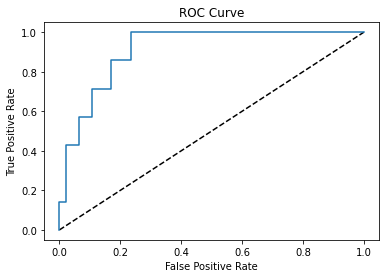

In [47]:
from sklearn.metrics import roc_curve
# Generate ROC curve values: fpr, tpr, thresholds
fpr, tpr, thresholds = roc_curve(test_Y, pred)
# Plot ROC curve
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()

In [48]:
from sklearn.metrics import roc_auc_score
roc_auc_score(test_Y,pred)

0.9118541033434651

## 2. KNN 

In [49]:
num_cols = ["Ekspor", "Cadangan Devisa", "IHSG", "Selisih Pinjaman dan Simpanan", "Suku Bunga Simpanan Riil",
            "Selisih BI Rate Riil dan FED Rate Riil", "Simpanan bank ", "Nilai Tukar Riil", "Nilai Tukar Perdagangan",
            "M1", "M2/Cadangan Devisa", "M2M"]

In [50]:
from sklearn.preprocessing import StandardScaler
ss=StandardScaler()
train_smote_X[num_cols]=ss.fit_transform(train_smote_X[num_cols])
test_X[num_cols]=ss.transform(test_X[num_cols])

In [51]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
knnc=KNeighborsClassifier()
param_grid = { 
    'n_neighbors': [1,2,3,4,5,6,7, 8, 9, 10],
    'metric': ['euclidean','manhatan']
}

In [52]:
from sklearn.model_selection import GridSearchCV
CV_knnc = GridSearchCV(estimator=knnc, param_grid=param_grid, cv= 5)
CV_knnc.fit(train_smote_X, train_smote_Y)

C:\Users\User\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\User\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\User\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\User\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'metric': ['euclidean', 'manhatan'],
                         'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]})

### Prediction

In [53]:
predKNN=CV_knnc.predict(test_X)

In [54]:
predKNN

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 1, 1], dtype=int64)

### Evaluation

In [55]:
print("Accuracy for KNN on CV data: ",accuracy_score(test_Y,predKNN))

Accuracy for KNN on CV data:  0.9259259259259259


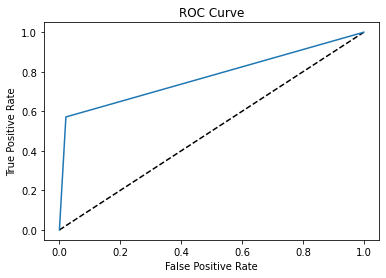

In [56]:
from sklearn.metrics import roc_curve
# Generate ROC curve values: fpr, tpr, thresholds
fpr, tpr, thresholds = roc_curve(test_Y, predKNN)
# Plot ROC curve
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()

In [57]:
from sklearn.metrics import roc_auc_score
roc_auc_score(test_Y,predKNN)

0.7750759878419452

In [58]:
testdata = pd.read_csv("predict.csv", sep=";")

In [59]:
testdata.head()

,Id,Ekspor,Cadangan Devisa,IHSG,Selisih Pinjaman dan Simpanan,Suku Bunga Simpanan Riil,Selisih BI Rate Riil dan FED Rate Riil,Simpanan bank,Nilai Tukar Riil,Nilai Tukar Perdagangan,M1,M2/Cadangan Devisa,M2M
0,2,1803.0,5914.1,638.79,1.26,14.73,3.92,15.655003,380.27,1.6888,12.27,0.0062,5.78
1,3,1802.0,5259.7,636.40,1.23,15.13,4.32,15.321895,384.14,1.0033,11.56,0.0071,6.92
2,7,2603.0,6514.5,468.51,1.15,17.85,9.96,17.309013,397.46,1.1523,12.33,0.0063,7.02
3,8,2639.0,6826.8,416.49,1.12,18.42,10.05,17.449252,400.90,1.4283,12.05,0.0061,7.14
4,11,2554.0,8539.8,383.02,1.17,20.61,12.36,18.391736,410.74,1.3151,12.04,0.0052,7.84


## 3. Support Vector Machine

Feature Scaling khusus SVM

In [60]:
from sklearn.preprocessing import StandardScaler
ss=StandardScaler()
train_smote_X_2=train_smote_X
test_X_2=test_X
train_smote_X_2[num_cols]=ss.fit_transform(train_smote_X_2[num_cols])
test_X_2[num_cols]=ss.transform(test_X_2[num_cols])

In [61]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
svm=SVC()
param_grid = { 
    "C" : [0.1, 1],
    "gamma" : [0.1, 1],
    "kernel":["linear","rbf"]
}

In [62]:
from sklearn.model_selection import GridSearchCV
CV_svm = GridSearchCV(estimator=svm, param_grid=param_grid, cv= 2)
CV_svm.fit(train_smote_X_2, train_smote_Y)

C:\Users\User\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\User\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\User\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\User\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel

GridSearchCV(cv=2, estimator=SVC(),
             param_grid={'C': [0.1, 1], 'gamma': [0.1, 1],
                         'kernel': ['linear', 'rbf']})

In [63]:
CV_svm.best_params_

{'C': 1, 'gamma': 1, 'kernel': 'rbf'}

In [64]:
data

,Ekspor,Cadangan Devisa,IHSG,Selisih Pinjaman dan Simpanan,Suku Bunga Simpanan Riil,Selisih BI Rate Riil dan FED Rate Riil,Simpanan bank,Nilai Tukar Riil,Nilai Tukar Perdagangan,M1,M2/Cadangan Devisa,M2M,Krisis
0,1845.2,6068.20,504.27,1.24,15.56,4.36,14.567329,376.63,1.2366,10.66,0.0055,6.46,0.0
1,2055.0,6259.10,612.20,1.24,16.63,5.83,16.707625,375.39,1.2129,12.15,0.0056,6.16,0.0
2,1750.0,5767.50,624.33,1.22,14.77,7.92,16.067787,388.69,1.0374,12.58,0.0066,6.77,0.0
3,1812.0,6392.70,614.41,1.19,14.29,7.91,16.274743,396.82,1.0315,12.23,0.0060,7.04,0.0
4,2124.0,6615.60,556.34,1.18,16.66,9.74,16.913348,397.52,1.0400,12.08,0.0060,6.76,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
265,13927.9,120075.16,6532.97,1.52,6.58,3.49,328.414357,18191.69,0.9291,97.89,0.0033,5.61,0.0
266,12555.9,123273.87,6443.35,1.53,6.99,4.13,330.319123,18087.59,1.0270,98.64,0.0033,5.77,0.0
267,14121.9,124539.31,6468.76,1.53,6.74,4.08,328.479665,18239.04,1.0499,100.14,0.0032,5.78,1.0
268,13112.7,124293.82,6455.35,1.54,6.39,3.72,330.069829,18186.00,0.8515,102.12,0.0033,5.66,1.0


### Prediction

In [68]:
predsvm=CV_svm.predict(test_X_2)

### Evaluation

In [69]:
from sklearn.metrics import accuracy_score
print("Accuracy for Logreg on test data: ",accuracy_score(test_Y,predsvm))

Accuracy for Logreg on test data:  0.9259259259259259


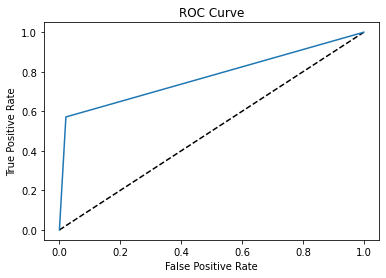

In [70]:
from sklearn.metrics import roc_curve
# Generate ROC curve values: fpr, tpr, thresholds
fpr, tpr, thresholds = roc_curve(test_Y, predsvm)
# Plot ROC curve
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()

In [71]:
from sklearn.metrics import roc_auc_score
roc_auc_score(test_Y,predsvm)

0.7750759878419452

## 4. Decision Tree

In [72]:
from sklearn import tree
dtc=tree.DecisionTreeClassifier()
param_grid = {"criterion":["gini","entropy"],
              'min_samples_split': [1,2,5,10,50,100],
             "max_depth":[1,2,3,4,5,6,7,8,9,10,11,12,13,14,15]}

In [73]:
CV_dtc = GridSearchCV(estimator=dtc, param_grid=param_grid, cv= 5)
CV_dtc.fit(train_smote_X, train_smote_Y)

C:\Users\User\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\User\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\User\anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 898, in fit
    super().fit(
  File "C:\Users\User\anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 237, in fit
    raise ValueError("min_samples_split must be an integer "
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\User\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning: Estimator fit failed. The score 

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                       13, 14, 15],
                         'min_samples_split': [1, 2, 5, 10, 50, 100]})

In [74]:
CV_dtc.best_params_

{'criterion': 'gini', 'max_depth': 14, 'min_samples_split': 2}

### Prediction

In [76]:
predtree=CV_dtc.predict(test_X)

### Evaluation

In [77]:
print("Accuracy for Decision Tree on CV data: ",accuracy_score(test_Y,predtree))

Accuracy for Decision Tree on CV data:  0.9074074074074074


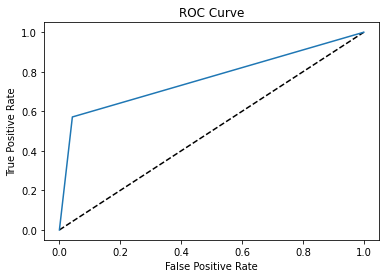

In [78]:
from sklearn.metrics import roc_curve
# Generate ROC curve values: fpr, tpr, thresholds
fpr, tpr, thresholds = roc_curve(test_Y, predtree)
# Plot ROC curve
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()

In [79]:
from sklearn.metrics import roc_auc_score
roc_auc_score(test_Y,predtree)

0.7644376899696049

## 5. Random Forest

In [80]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
rfc=RandomForestClassifier()
param_grid = { 
    'n_estimators': [200, 500,1000],
    'max_features': ['auto','log2'],
    'criterion' :['entropy','gini']
}

In [81]:
CV_rfc = GridSearchCV(estimator=rfc, param_grid=param_grid, cv= 3)
CV_rfc.fit(train_smote_X, train_smote_Y)

C:\Users\User\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\User\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\User\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\User\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:593: DataConversionWarning: A column-vector y was pa

GridSearchCV(cv=3, estimator=RandomForestClassifier(),
             param_grid={'criterion': ['entropy', 'gini'],
                         'max_features': ['auto', 'log2'],
                         'n_estimators': [200, 500, 1000]})

In [82]:
CV_rfc.best_params_

{'criterion': 'gini', 'max_features': 'log2', 'n_estimators': 500}

### Prediction

In [83]:
pred=CV_rfc.predict(test_X)

### Evaluation

In [84]:
print("Accuracy for Random Forest on CV data: ",accuracy_score(test_Y,pred))

Accuracy for Random Forest on CV data:  0.9444444444444444


In [85]:
from sklearn.metrics import classification_report
target_names = ['No','Yes']
print(classification_report(test_Y, pred, target_names=target_names))

              precision    recall  f1-score   support

          No       0.96      0.98      0.97        47
         Yes       0.83      0.71      0.77         7

    accuracy                           0.94        54
   macro avg       0.90      0.85      0.87        54
weighted avg       0.94      0.94      0.94        54



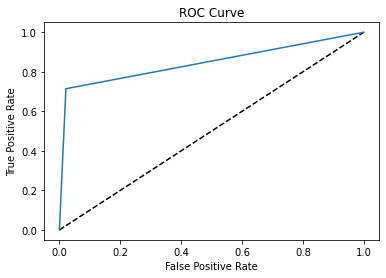

In [86]:
from sklearn.metrics import roc_curve
# Generate ROC curve values: fpr, tpr, thresholds
fpr, tpr, thresholds = roc_curve(test_Y, pred)
# Plot ROC curve
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()

In [87]:
from sklearn.metrics import roc_auc_score
roc_auc_score(test_Y,pred)

0.8465045592705167